#Processing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NCKH_2023-2024
!unzip data.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: data/Hank_Azaria/Hank_Azaria_42258_22589.jpeg  
  inflating: __MACOSX/data/Hank_Azaria/._Hank_Azaria_42258_22589.jpeg  
  inflating: data/Hank_Azaria/Hank_Azaria_42215_22558.jpeg  
  inflating: __MACOSX/data/Hank_Azaria/._Hank_Azaria_42215_22558.jpeg  
  inflating: data/Hank_Azaria/Hank_Azaria_42023_22440.jpeg  
  inflating: __MACOSX/data/Hank_Azaria/._Hank_Azaria_42023_22440.jpeg  
  inflating: data/Hank_Azaria/Hank_Azaria_42075_22475.jpeg  
  inflating: __MACOSX/data/Hank_Azaria/._Hank_Azaria_42075_22475.jpeg  
  inflating: data/Hank_Azaria/Hank_Azaria_42271_22599.jpeg  
  inflating: __MACOSX/data/Hank_Azaria/._Hank_Azaria_42271_22599.jpeg  
  inflating: data/Hank_Azaria/Hank_Azaria_42049_22457.jpeg  
  inflating: __MACOSX/data/Hank_Azaria/._Hank_Azaria_42049_22457.jpeg  
  inflating: data/Hank_Azaria/Hank_Azaria_42151_22521.jpeg  
  inflating: __MACOSX/data/Hank_Azaria/._Hank_Azaria_42151_22521.jpeg  
  inflating:

#Import các thư viện cần thiết

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import backend as K
import sklearn
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

#AutoEncoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

class AutoEncoder(tf.keras.Model):

    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder layers
        self.encoder = tf.keras.Sequential([
            Conv2D(256, (3, 3), activation='relu', padding='same'),
            Conv2D(128, (3, 3), activation='relu', padding='same'),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            Conv2D(16, (3, 3), activation='relu', padding='same'),
            Conv2D(8, (1, 1), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(4, (3, 3), activation='relu', padding='same'),
            Conv2D(2, (1, 1), activation='relu', padding='same'),
            # Conv2D(1, (1, 1), activation='relu', padding='same'),
            Flatten()
        ])

        # Decoder layers
        self.decoder = tf.keras.Sequential([
            Reshape((32, 32, 2)),
            Conv2D(2, (1, 1), activation='relu', padding='same'),
            Conv2D(4, (3, 3), activation='relu', padding='same'),
            Conv2D(8, (3, 3), activation='relu', padding='same'),
            UpSampling2D(size=(2, 2)),
            Conv2D(16, (3, 3), activation='relu', padding='same'),
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            UpSampling2D(size=(2, 2)),
            Conv2D(128, (3, 3), activation='relu', padding='same'),
            Conv2D(256, (3, 3), activation='relu', padding='same'),
            Conv2D(3, (3, 3), activation='tanh', padding='same')  # Output with 3 channels for RGB
        ])
        # Set initial mode to train both encoder and decoder
        self.train()

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self):
        self.e = True
        self.d = False

    def decode(self):
        self.e = False
        self.d = True

    def train(self):
        self.e = True
        self.d = True


In [ ]:
train_data_dir = '/content/drive/MyDrive/NCKH/data/train'
test_data_dir = '/content/drive/MyDrive/NCKH/data/test'

In [ ]:
model = AutoEncoder()
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.001))

In [ ]:
model.build(input_shape=(None, 128, 128, 3))

In [ ]:
model.encoder.summary()
model.decoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     295040    
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        4624      
                                                        

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# network parameters
sample      = 6000
image_size  = 128
input_shape = (image_size, image_size, 3)
batch_size  = 32
epochs      = 50

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='input'  # Dữ liệu đầu vào và đầu ra giống nhau (autoencoder)
)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='input'  # Dữ liệu đầu vào và đầu ra giống nhau (autoencoder)
)
train_generator_inf = test_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='input'  # Dữ liệu đầu vào và đầu ra giống nhau (autoencoder)
)

Found 2119 images belonging to 530 classes.
Found 547 images belonging to 530 classes.
Found 2119 images belonging to 530 classes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = train_generator.next()[0][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
# # Save best model
# from keras.callbacks import TensorBoard

# filepath       = "base-weights.hdf5"
# checkpoint     = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    # callbacks=callbacks_list
)

Epoch 1/50
67/67 [==============================] - 701s 10s/step - loss: 0.0769 - val_loss: 0.0584
Epoch 2/50
67/67 [==============================] - 26s 380ms/step - loss: 0.0567 - val_loss: 0.0557
Epoch 3/50
67/67 [==============================] - 26s 382ms/step - loss: 0.0508 - val_loss: 0.0471
Epoch 4/50
67/67 [==============================] - 26s 390ms/step - loss: 0.0461 - val_loss: 0.0428
Epoch 5/50
67/67 [==============================] - 26s 392ms/step - loss: 0.0304 - val_loss: 0.0185
Epoch 6/50
67/67 [==============================] - 27s 396ms/step - loss: 0.0153 - val_loss: 0.0142
Epoch 7/50
67/67 [==============================] - 27s 396ms/step - loss: 0.0134 - val_loss: 0.0126
Epoch 8/50
67/67 [==============================] - 28s 410ms/step - loss: 0.0099 - val_loss: 0.0087
Epoch 9/50
67/67 [==============================] - 27s 402ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 10/50
67/67 [==============================] - 27s 400ms/step - loss: 0.0063 - val_los

#Predict and results

In [ ]:
from tensorflow.keras.preprocessing import image

# Lấy một ảnh từ thư mục kiểm tra
img_path = '/content/drive/MyDrive/NCKH/data/test/Adam_McKay/Adam_McKay_778_463.jpeg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)  # Thêm chiều batch


In [ ]:
#rescale giống như trong quá trình train
img_array /= 255.0

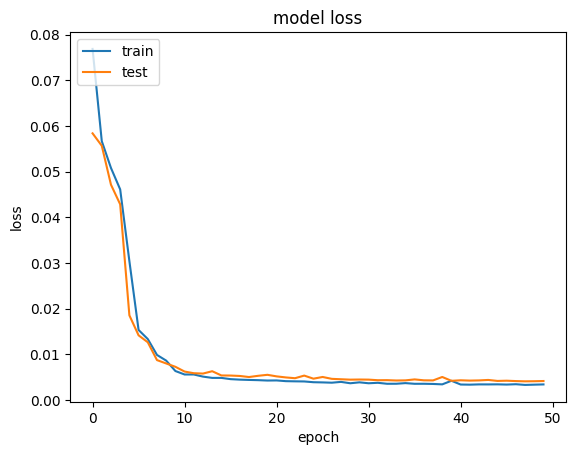

In [ ]:
def plt_hist(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

plt_hist(history)

In [ ]:
model.encode()

encodings = model.predict(img_array)

1/1 [==============================] - 1s 1s/step


In [ ]:
#Setup Decoding Mode
model.decode()
#Decode 10 sample images
decodings = model.predict(encodings)

1/1 [==============================] - 0s 28ms/step


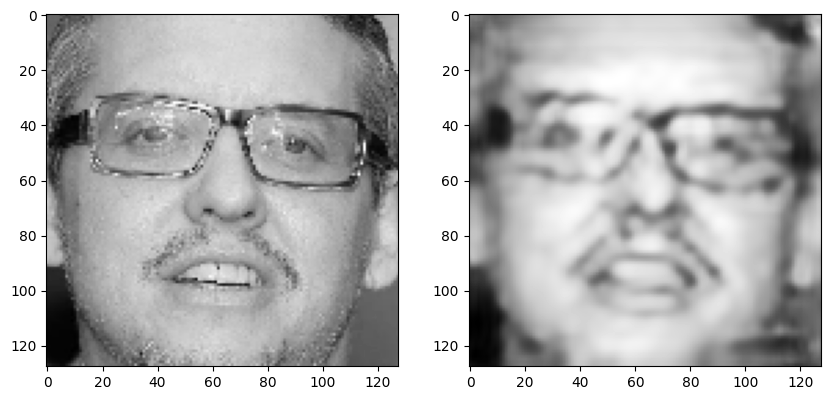

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(10, 20))
columns = 2
rows = 1
j = 0
k = 0
for i in range(1, columns*rows +1):
    if i%2 == 0:
        img = decodings[j,...,0]
        j+=1
    else:
        img = img_array[k,...,0]
        k+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap = 'gray')
plt.show()